In [1]:
import pandas as pd
import numpy as np

tables = pd.read_html('fbdata.html')
df1 = tables[10]
df1.head()

/Users/sant/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2     Rodrigo Abajas             es ESP                 DF   
2                  3     James Abankwah             ie IRL              DF,MF   
3                  4  Keyliane Abdallah             fr FRA                 FW   
4                  5   Yunis Abdelhamid             ma MAR                 DF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League             24-359   
1           Valencia          es La Liga             21-230   
2            Udinese          it Serie A             20-347   
3          Marseille          fr Ligue 1             18-267   
4      Saint-Étienne          fr Ligue 1             37-091   

  Unnamed: 7_level_0 Playing Time         ... Per 90 Minutes              \
                Born           MP Starts  ...            Ast   G+A  G-PK   
0               2000            2      1  ...           0.00  0.00  0.00   
1               2003            1      1  ...           0.00  0.00  0.00   
2               2004            5      0  ...           0.00  0.00  0.00   
3               2006            1      0  ...           0.00  0.00  0.00   
4               1987           11     11  ...           0.00  0.00  0.00   

                                           Unnamed: 37_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
1   0.00  0.10  0.00   0.10  0.10     0.10             Matches  
2   0.00  0.08  0.00   0.08  0.08     0.08             Matches  
3   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
4   0.00  0.02  0.00   0.03  0.02     0.03             Matches  

[5 rows x 38 columns]

In [2]:
df1 = df1[df1.columns.drop(list(df1.filter(regex='Per 90')))]
df1 = df1.droplevel(0, axis=1)
df1.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-359,2000,2,1,...,0,0,0.0,0.0,0.0,0.0,1,7,3,Matches
1,2,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21-230,2003,1,1,...,1,0,0.1,0.1,0.0,0.1,3,2,3,Matches
2,3,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20-347,2004,5,0,...,0,0,0.1,0.1,0.0,0.1,2,4,0,Matches
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18-267,2006,1,0,...,0,0,0.0,0.0,0.0,0.0,1,0,0,Matches
4,5,Yunis Abdelhamid,ma MAR,DF,Saint-Étienne,fr Ligue 1,37-091,1987,11,11,...,2,0,0.2,0.2,0.0,0.3,4,22,3,Matches


In [3]:
pl_df = df1[df1['Comp'] == 'eng Premier League']
pl_df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-359,2000,2,1,...,0,0,0.0,0.0,0.0,0.0,1,7,3,Matches
22,23,Tyler Adams,us USA,MF,Bournemouth,eng Premier League,25-318,1999,9,5,...,2,0,1.1,1.1,0.4,1.5,3,22,0,Matches
24,25,Tosin Adarabioyo,eng ENG,DF,Chelsea,eng Premier League,27-095,1997,8,6,...,1,0,0.3,0.3,0.0,0.3,0,13,0,Matches
28,28,Simon Adingra,ci CIV,"FW,MF",Brighton,eng Premier League,22-362,2002,11,3,...,0,0,0.6,0.6,0.6,1.2,14,6,55,Matches
36,36,Asher Agbinone,eng ENG,MF,Crystal Palace,eng Premier League,19-091,2005,2,0,...,0,0,0.0,0.0,0.0,0.1,2,0,1,Matches


In [4]:
pl_df = pl_df[['Player', 'Squad', 'MP', 'Starts', 'Min', '90s', 'CrdY', 'Gls', 'Ast', 'G+A', 'xG', 'xAG']]

pl_df.loc[:, pl_df.columns.difference(['Player', 'Squad'])] = pl_df.loc[:, pl_df.columns.difference(['Player', 'Squad'])].apply(pd.to_numeric, errors='coerce')

pl_df['xG+xAG'] = pl_df['xG'] + pl_df['xAG']
pl_df['(Gls+Ast)/MP'] = (pl_df['Gls'] + pl_df['Ast']) / pl_df['MP']
pl_df.head()

,Player,Squad,MP,Starts,Min,90s,CrdY,Gls,Ast,G+A,xG,xAG,xG+xAG,(Gls+Ast)/MP
0,Max Aarons,Bournemouth,2,1,77,0.9,0,0,0,0,0.0,0.0,0.0,0.0
22,Tyler Adams,Bournemouth,9,5,485,5.4,2,0,0,0,1.1,0.4,1.5,0.0
24,Tosin Adarabioyo,Chelsea,8,6,533,5.9,1,0,0,0,0.3,0.0,0.3,0.0
28,Simon Adingra,Brighton,11,3,349,3.9,0,1,1,2,0.6,0.6,1.2,0.181818
36,Asher Agbinone,Crystal Palace,2,0,6,0.1,0,0,0,0,0.0,0.0,0.0,0.0


In [5]:
pl_df[pl_df['MP'] > 0.7 * pl_df['MP'].max()].sort_values(by='(Gls+Ast)/MP', ascending=False).head(30)

,Player,Squad,MP,Starts,Min,90s,CrdY,Gls,Ast,G+A,xG,xAG,xG+xAG,(Gls+Ast)/MP
2010,Mohamed Salah,Liverpool,17,17,1492,16.6,1,16,11,27,13.6,6.8,20.4,1.588235
1769,Cole Palmer,Chelsea,18,18,1567,17.4,3,12,6,18,10.7,6.6,17.3,1.0
2006,Bukayo Saka,Arsenal,16,16,1268,14.1,3,5,10,15,4.2,5.8,10.0,0.9375
1054,Alexander Isak,Newcastle Utd,16,16,1288,14.3,0,11,4,15,9.5,2.9,12.4,0.9375
540,Matheus Cunha,Wolves,18,17,1515,16.8,2,10,4,14,4.0,5.5,9.5,0.777778
952,Erling Haaland,Manchester City,18,18,1619,18.0,2,13,1,14,14.0,1.2,15.2,0.777778
999,Son Heung-min,Tottenham,15,14,1146,12.7,0,5,6,11,3.7,5.8,9.5,0.733333
2433,Yoane Wissa,Brentford,14,13,1047,11.6,2,9,1,10,6.4,0.8,7.2,0.714286
1067,Nicolas Jackson,Chelsea,17,17,1328,14.8,4,9,3,12,9.1,1.9,11.0,0.705882
1476,Bryan Mbeumo,Brentford,17,17,1524,16.9,2,10,2,12,4.9,3.3,8.2,0.705882


In [6]:
pl_df[pl_df['MP'] > 0.7 * pl_df['MP'].max()].sort_values(by='xG+xAG', ascending=False).head(30)

,Player,Squad,MP,Starts,Min,90s,CrdY,Gls,Ast,G+A,xG,xAG,xG+xAG,(Gls+Ast)/MP
2010,Mohamed Salah,Liverpool,17,17,1492,16.6,1,16,11,27,13.6,6.8,20.4,1.588235
1769,Cole Palmer,Chelsea,18,18,1567,17.4,3,12,6,18,10.7,6.6,17.3,1.0
952,Erling Haaland,Manchester City,18,18,1619,18.0,2,13,1,14,14.0,1.2,15.2,0.777778
1054,Alexander Isak,Newcastle Utd,16,16,1288,14.3,0,11,4,15,9.5,2.9,12.4,0.9375
1067,Nicolas Jackson,Chelsea,17,17,1328,14.8,4,9,3,12,9.1,1.9,11.0,0.705882
764,Bruno Fernandes,Manchester Utd,18,18,1475,16.4,3,4,5,9,6.2,4.2,10.4,0.5
2406,Ollie Watkins,Aston Villa,18,14,1182,13.1,0,7,3,10,8.8,1.6,10.4,0.555556
2006,Bukayo Saka,Arsenal,16,16,1268,14.1,3,5,10,15,4.2,5.8,10.0,0.9375
2151,Dominic Solanke,Tottenham,15,15,1328,14.8,0,6,3,9,7.6,2.1,9.7,0.6
999,Son Heung-min,Tottenham,15,14,1146,12.7,0,5,6,11,3.7,5.8,9.5,0.733333


In [7]:
import warnings
warnings.filterwarnings('ignore')

filtered_df = pl_df[
    (pl_df['MP'] > 0.8 * pl_df['MP'].max()) | 
    (pl_df['Player'] == 'João Pedro') | (pl_df['Player'] == 'Diogo Jota') | (pl_df['Player'] == 'Eberechi Eze')]
filtered_df['rank_GlsAst_per_MP'] = filtered_df['(Gls+Ast)/MP'].rank(ascending=False)
filtered_df['rank_xG_xAG'] = filtered_df['xG+xAG'].rank(ascending=False)
filtered_df['combined_rank'] = filtered_df['rank_GlsAst_per_MP'] + filtered_df['rank_xG_xAG']
filtered_df['Gls+Ast'] = filtered_df['Gls'] + filtered_df['Ast']
filtered_df['delta'] = filtered_df['Gls+Ast'] - filtered_df['xG+xAG']

filtered_df['actual_score'] = (filtered_df['(Gls+Ast)/MP'] - filtered_df['(Gls+Ast)/MP'].min()) / (filtered_df['(Gls+Ast)/MP'].max() - filtered_df['(Gls+Ast)/MP'].min())
filtered_df['expected_score'] = (filtered_df['xG+xAG'] - filtered_df['xG+xAG'].min()) / (filtered_df['xG+xAG'].max() - filtered_df['xG+xAG'].min())
filtered_df['power_score'] = (0.6 * filtered_df['actual_score'] + 0.4 * filtered_df['expected_score']).round(3)

filtered_df = filtered_df.sort_values('power_score', ascending=False)
filtered_df['delta2'] = (filtered_df['power_score'].shift(1) - filtered_df['power_score']).round(3)
filtered_df.iloc[0, filtered_df.columns.get_loc('delta2')] = 0.000

top = filtered_df.head(30)
max_power = top['power_score'].max()
min_power = top['power_score'].min()
power_range = max_power - min_power

def style_df(df):
    def color_player(val):
        if not isinstance(val, str):  # skip non-player cells
            return ''
            
        idx = df.index[df['Player'] == val][0]
        score = df.loc[idx, 'power_score']
        
        if score >= max_power - power_range * 0.2:
            return 'color: gold'
        elif score >= max_power - power_range * 0.4:
            return 'color: silver'
        elif score >= max_power - power_range * 0.6:
            return 'color: #CD7F32'  # bronze
        elif score >= max_power - power_range * 0.8:
            return 'color: green'
        else:
            return 'color: purple'
            
    return df.style.applymap(color_player, subset=['Player'])

styled_df = style_df(top[['Player', 'MP', 'Min', '90s', '(Gls+Ast)/MP', 'Gls+Ast', 'xG+xAG', 'delta', 'power_score', 'delta2']])
styled_df

,Player,MP,Min,90s,(Gls+Ast)/MP,Gls+Ast,xG+xAG,delta,power_score,delta2
2010,Mohamed Salah,17,1492,16.600000,1.588235,27,20.400000,6.600000,1.000000,0.000000
1769,Cole Palmer,18,1567,17.400000,1.000000,18,17.300000,0.700000,0.716993,0.283007
1054,Alexander Isak,16,1288,14.300000,0.937500,15,12.400000,2.600000,0.597304,0.119690
952,Erling Haaland,18,1619,18.000000,0.777778,14,15.200000,-1.200000,0.591866,0.005438
2006,Bukayo Saka,16,1268,14.100000,0.937500,15,10.000000,5.000000,0.550245,0.041621
1067,Nicolas Jackson,17,1328,14.800000,0.705882,12,11.000000,1.000000,0.482353,0.067892
540,Matheus Cunha,18,1515,16.800000,0.777778,14,9.500000,4.500000,0.480102,0.002251
999,Son Heung-min,15,1146,12.700000,0.733333,11,9.500000,1.500000,0.463312,0.016790
1476,Bryan Mbeumo,17,1524,16.900000,0.705882,12,8.200000,3.800000,0.427451,0.035861
2151,Dominic Solanke,15,1328,14.800000,0.600000,9,9.700000,-0.700000,0.416863,0.010588


In [8]:
filtered_df[filtered_df['Player'].str.contains('Kluivert')].sort_values(by='power_score', ascending=False).head(30)
# pl_df.loc[1073]

,Player,Squad,MP,Starts,Min,90s,CrdY,Gls,Ast,G+A,...,(Gls+Ast)/MP,rank_GlsAst_per_MP,rank_xG_xAG,combined_rank,Gls+Ast,delta,actual_score,expected_score,power_score,delta2
1186,Justin Kluivert,Bournemouth,18,15,1127,12.5,5,6,2,8,...,0.444444,26.5,14.5,41.0,8,-0.7,0.279835,0.426471,0.338489,0.003422


In [9]:
tables = pd.read_html('pldata.html')
df2 = tables[9]
df2.head(20)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,17,13,3,1,40,17,23,42,2.47,38.2,16.3,21.9,1.29,W D D W W,60277,Mohamed Salah - 16,Alisson,NaN
1,2,Chelsea,18,10,5,3,38,21,17,35,1.94,36.5,26.1,10.4,0.58,W W W D L,39730,Cole Palmer - 12,Robert Sánchez,NaN
2,3,Nott'ham Forest,18,10,4,4,24,19,5,34,1.89,21.7,18.9,2.9,0.16,L W W W W,30008,Chris Wood - 10,Matz Sels,NaN
3,4,Arsenal,17,9,6,2,34,16,18,33,1.94,29.3,15.8,13.5,0.79,W W D D W,60291,Kai Havertz - 6,David Raya,NaN
4,5,Newcastle Utd,18,8,5,5,30,21,9,29,1.61,30.3,21.7,8.6,0.48,D L W W W,52206,Alexander Isak - 11,Nick Pope,NaN
5,6,Bournemouth,18,8,5,5,27,21,6,29,1.61,35.4,22.7,12.7,0.71,W W D W D,11208,Justin Kluivert - 6,Kepa Arrizabalaga,NaN
6,7,Manchester City,18,8,4,6,30,26,4,28,1.56,32.8,25.6,7.1,0.40,W D L L D,52679,Erling Haaland - 13,Ederson,NaN
7,8,Fulham,18,7,7,4,26,23,3,28,1.56,24.6,21.5,3.1,0.17,W D D D W,26237,"Raúl Jiménez, Alex Iwobi - 5",Bernd Leno,NaN
8,9,Aston Villa,18,8,4,6,26,29,-3,28,1.56,27.4,22.9,4.6,0.25,W W L W L,41901,"Ollie Watkins, Jhon Durán - 7",Emiliano Martínez,NaN
9,10,Brighton,17,6,7,4,27,26,1,25,1.47,23.9,26.8,-2.9,-0.17,D L D L D,32754,Danny Welbeck - 6,Bart Verbruggen,NaN


In [10]:
df2 = df2.loc[:, ~df2.columns.duplicated()]
tm_df = df2[['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90']].copy()

for column in tm_df.columns:
    if column != 'Squad':
        tm_df[column] = pd.to_numeric(tm_df[column], errors='coerce')

tm_df['GF-xG'] = tm_df['GF'] - tm_df['xG']
tm_df['GA-xGA'] = tm_df['GA'] - tm_df['xGA']
tm_df['xG/MP'] = tm_df['xG'] / tm_df['MP']
tm_df['GF/MP'] = tm_df['GF'] / tm_df['MP']
tm_df['xGA/MP'] = tm_df['xGA'] / tm_df['MP']
tm_df['GA/MP'] = tm_df['GA'] / tm_df['MP']
tm_df['%W'] = tm_df['W'] * 100 / tm_df['MP']

def color_max_min(s):
    if s.name in ['GA', 'xGA', 'GA-xGA', 'D', 'L', 'xGA/MP', 'GA/MP']:
        return ['color: #00CC00' if v == min(s) 
                else 'color: #FF0000' if v == max(s)
                else '' for v in s]
    elif s.name not in ['Rk', 'Squad', 'MP']:
        return ['color: #00CC00' if v == max(s) 
                else 'color: #FF0000' if v == min(s)
                else '' for v in s]
    else:
        return ['' for v in s]

tm_df_styled = tm_df.head(20).style.apply(color_max_min)
tm_df_styled

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Pts/MP,xG,xGA,xGD,xGD/90,GF-xG,GA-xGA,xG/MP,GF/MP,xGA/MP,GA/MP,%W
0,1,Liverpool,17,13,3,1,40,17,42,2.470000,38.200000,16.300000,21.900000,1.290000,1.800000,0.700000,2.247059,2.352941,0.958824,1.000000,76.470588
1,2,Chelsea,18,10,5,3,38,21,35,1.940000,36.500000,26.100000,10.400000,0.580000,1.500000,-5.100000,2.027778,2.111111,1.450000,1.166667,55.555556
2,3,Nott'ham Forest,18,10,4,4,24,19,34,1.890000,21.700000,18.900000,2.900000,0.160000,2.300000,0.100000,1.205556,1.333333,1.050000,1.055556,55.555556
3,4,Arsenal,17,9,6,2,34,16,33,1.940000,29.300000,15.800000,13.500000,0.790000,4.700000,0.200000,1.723529,2.000000,0.929412,0.941176,52.941176
4,5,Newcastle Utd,18,8,5,5,30,21,29,1.610000,30.300000,21.700000,8.600000,0.480000,-0.300000,-0.700000,1.683333,1.666667,1.205556,1.166667,44.444444
5,6,Bournemouth,18,8,5,5,27,21,29,1.610000,35.400000,22.700000,12.700000,0.710000,-8.400000,-1.700000,1.966667,1.500000,1.261111,1.166667,44.444444
6,7,Manchester City,18,8,4,6,30,26,28,1.560000,32.800000,25.600000,7.100000,0.400000,-2.800000,0.400000,1.822222,1.666667,1.422222,1.444444,44.444444
7,8,Fulham,18,7,7,4,26,23,28,1.560000,24.600000,21.500000,3.100000,0.170000,1.400000,1.500000,1.366667,1.444444,1.194444,1.277778,38.888889
8,9,Aston Villa,18,8,4,6,26,29,28,1.560000,27.400000,22.900000,4.600000,0.250000,-1.400000,6.100000,1.522222,1.444444,1.272222,1.611111,44.444444
9,10,Brighton,17,6,7,4,27,26,25,1.470000,23.900000,26.800000,-2.900000,-0.170000,3.100000,-0.800000,1.405882,1.588235,1.576471,1.529412,35.294118


In [11]:
tm_df.sort_values(by='xGA/MP', ascending=True).head(20)

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Pts/MP,...,xGA,xGD,xGD/90,GF-xG,GA-xGA,xG/MP,GF/MP,xGA/MP,GA/MP,%W
3,4,Arsenal,17,9,6,2,34,16,33,1.94,...,15.8,13.5,0.79,4.7,0.2,1.723529,2.000000,0.929412,0.941176,52.941176
0,1,Liverpool,17,13,3,1,40,17,42,2.47,...,16.3,21.9,1.29,1.8,0.7,2.247059,2.352941,0.958824,1.000000,76.470588
2,3,Nott'ham Forest,18,10,4,4,24,19,34,1.89,...,18.9,2.9,0.16,2.3,0.1,1.205556,1.333333,1.050000,1.055556,55.555556
7,8,Fulham,18,7,7,4,26,23,28,1.56,...,21.5,3.1,0.17,1.4,1.5,1.366667,1.444444,1.194444,1.277778,38.888889
4,5,Newcastle Utd,18,8,5,5,30,21,29,1.61,...,21.7,8.6,0.48,-0.3,-0.7,1.683333,1.666667,1.205556,1.166667,44.444444
5,6,Bournemouth,18,8,5,5,27,21,29,1.61,...,22.7,12.7,0.71,-8.4,-1.7,1.966667,1.500000,1.261111,1.166667,44.444444
8,9,Aston Villa,18,8,4,6,26,29,28,1.56,...,22.9,4.6,0.25,-1.4,6.1,1.522222,1.444444,1.272222,1.611111,44.444444
14,15,Everton,17,3,8,6,15,22,17,1.00,...,23.4,-6.9,-0.40,-1.5,-1.4,0.970588,0.882353,1.376471,1.294118,17.647059
13,14,Manchester Utd,18,6,4,8,21,24,22,1.22,...,25.2,0.6,0.03,-4.8,-1.2,1.433333,1.166667,1.400000,1.333333,33.333333
6,7,Manchester City,18,8,4,6,30,26,28,1.56,...,25.6,7.1,0.40,-2.8,0.4,1.822222,1.666667,1.422222,1.444444,44.444444


In [12]:
tm_df.sort_values(by='xG/MP', ascending=False).head(20)

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Pts/MP,...,xGA,xGD,xGD/90,GF-xG,GA-xGA,xG/MP,GF/MP,xGA/MP,GA/MP,%W
0,1,Liverpool,17,13,3,1,40,17,42,2.47,...,16.3,21.9,1.29,1.8,0.7,2.247059,2.352941,0.958824,1.000000,76.470588
1,2,Chelsea,18,10,5,3,38,21,35,1.94,...,26.1,10.4,0.58,1.5,-5.1,2.027778,2.111111,1.450000,1.166667,55.555556
5,6,Bournemouth,18,8,5,5,27,21,29,1.61,...,22.7,12.7,0.71,-8.4,-1.7,1.966667,1.500000,1.261111,1.166667,44.444444
6,7,Manchester City,18,8,4,6,30,26,28,1.56,...,25.6,7.1,0.40,-2.8,0.4,1.822222,1.666667,1.422222,1.444444,44.444444
10,11,Tottenham,18,7,2,9,39,26,23,1.28,...,30.4,2.3,0.13,6.3,-4.4,1.816667,2.166667,1.688889,1.444444,38.888889
3,4,Arsenal,17,9,6,2,34,16,33,1.94,...,15.8,13.5,0.79,4.7,0.2,1.723529,2.000000,0.929412,0.941176,52.941176
4,5,Newcastle Utd,18,8,5,5,30,21,29,1.61,...,21.7,8.6,0.48,-0.3,-0.7,1.683333,1.666667,1.205556,1.166667,44.444444
11,12,Brentford,17,7,2,8,32,32,23,1.35,...,28.5,-2.4,-0.14,5.9,3.5,1.535294,1.882353,1.676471,1.882353,41.176471
8,9,Aston Villa,18,8,4,6,26,29,28,1.56,...,22.9,4.6,0.25,-1.4,6.1,1.522222,1.444444,1.272222,1.611111,44.444444
12,13,West Ham,18,6,5,7,23,30,23,1.28,...,31.0,-4.6,-0.25,-3.4,-1.0,1.466667,1.277778,1.722222,1.666667,33.333333


In [13]:
pldf_relevant = pl_df[['Player', 'Squad', 'Gls', 'Ast', 'xG', 'xAG']]
tmdf_relevant = tm_df[['Squad', 'GF', 'xG']].rename(columns={'GF': 'squad_g', 'xG': 'squad_xg'})

talismen = pldf_relevant.merge(tmdf_relevant, on='Squad', how='left')

talismen['player_g+ag'] = talismen['Gls'] + talismen['Ast']
talismen['player_xg+xag'] = talismen['xG'] + talismen['xAG']
talismen['player_g+ag/squad_g'] = talismen['player_g+ag']*100 / talismen['squad_g']
talismen['player_xg+xag/squad_xg'] = talismen['player_xg+xag']*100 / talismen['squad_xg']
talismen['player_g/player_ag'] = talismen.apply(
    lambda row: row['Gls'] / row['Ast'] if row['Ast'] != 0 else np.nan, axis=1
)

talismen.head()

talismen.rename(columns={
    'Player': 'player',
    'Squad': 'squad',
    'Gls': 'player_g',
    'Ast': 'player_ag',
    'xG': 'player_xg',
    'xAG': 'player_xag'
}, inplace=True)

talismen.head()

,player,squad,player_g,player_ag,player_xg,player_xag,squad_g,squad_xg,player_g+ag,player_xg+xag,player_g+ag/squad_g,player_xg+xag/squad_xg,player_g/player_ag
0,Max Aarons,Bournemouth,0,0,0.0,0.0,27,35.4,0,0.0,0.0,0.0,NaN
1,Tyler Adams,Bournemouth,0,0,1.1,0.4,27,35.4,0,1.5,0.0,4.237288,NaN
2,Tosin Adarabioyo,Chelsea,0,0,0.3,0.0,38,36.5,0,0.3,0.0,0.821918,NaN
3,Simon Adingra,Brighton,1,1,0.6,0.6,27,23.9,2,1.2,7.407407,5.020921,1.0
4,Asher Agbinone,Crystal Palace,0,0,0.0,0.0,18,23.9,0,0.0,0.0,0.0,NaN


In [14]:
talismen.sort_values(by='player_g+ag/squad_g', ascending=False).head(20)

,player,squad,player_g,player_ag,player_xg,player_xag,squad_g,squad_xg,player_g+ag,player_xg+xag,player_g+ag/squad_g,player_xg+xag/squad_xg,player_g/player_ag
380,Mohamed Salah,Liverpool,16,11,13.6,6.8,40,38.2,27,20.4,67.5,53.403141,1.454545
209,Alexander Isak,Newcastle Utd,11,4,9.5,2.9,30,30.3,15,12.4,50.0,40.924092,2.750000
95,Matheus Cunha,Wolves,10,4,4.0,5.5,29,18.7,14,9.5,48.275862,50.802139,2.500000
344,Cole Palmer,Chelsea,12,6,10.7,6.6,38,36.5,18,17.3,47.368421,47.39726,2.000000
184,Erling Haaland,Manchester City,13,1,14.0,1.2,30,32.8,14,15.2,46.666667,46.341463,13.000000
379,Bukayo Saka,Arsenal,5,10,4.2,5.8,34,29.3,15,10.0,44.117647,34.129693,0.500000
104,Liam Delap,Ipswich Town,6,1,4.4,1.3,16,15.9,7,5.7,43.75,35.849057,6.000000
149,Bruno Fernandes,Manchester Utd,4,5,6.2,4.2,21,25.8,9,10.4,42.857143,40.310078,0.800000
484,Chris Wood,Nott'ham Forest,10,0,6.5,1.0,24,21.7,10,7.5,41.666667,34.562212,NaN
456,Jamie Vardy,Leicester City,6,3,5.4,2.0,22,17.5,9,7.4,40.909091,42.285714,2.000000


In [15]:
talismen.sort_values(by='player_xg+xag/squad_xg', ascending=False).head(20)

,player,squad,player_g,player_ag,player_xg,player_xag,squad_g,squad_xg,player_g+ag,player_xg+xag,player_g+ag/squad_g,player_xg+xag/squad_xg,player_g/player_ag
380,Mohamed Salah,Liverpool,16,11,13.6,6.8,40,38.2,27,20.4,67.5,53.403141,1.454545
95,Matheus Cunha,Wolves,10,4,4.0,5.5,29,18.7,14,9.5,48.275862,50.802139,2.500000
344,Cole Palmer,Chelsea,12,6,10.7,6.6,38,36.5,18,17.3,47.368421,47.39726,2.000000
184,Erling Haaland,Manchester City,13,1,14.0,1.2,30,32.8,14,15.2,46.666667,46.341463,13.000000
456,Jamie Vardy,Leicester City,6,3,5.4,2.0,22,17.5,9,7.4,40.909091,42.285714,2.000000
209,Alexander Isak,Newcastle Utd,11,4,9.5,2.9,30,30.3,15,12.4,50.0,40.924092,2.750000
149,Bruno Fernandes,Manchester Utd,4,5,6.2,4.2,21,25.8,9,10.4,42.857143,40.310078,0.800000
471,Ollie Watkins,Aston Villa,7,3,8.8,1.6,26,27.4,10,10.4,38.461538,37.956204,2.333333
104,Liam Delap,Ipswich Town,6,1,4.4,1.3,16,15.9,7,5.7,43.75,35.849057,6.000000
484,Chris Wood,Nott'ham Forest,10,0,6.5,1.0,24,21.7,10,7.5,41.666667,34.562212,NaN


In [16]:
talismen['actual_score'] = (talismen['player_g+ag/squad_g'] - talismen['player_g+ag/squad_g'].min()) / (talismen['player_g+ag/squad_g'].max() - talismen['player_g+ag/squad_g'].min())
talismen['expected_score'] = (talismen['player_xg+xag/squad_xg'] - talismen['player_xg+xag/squad_xg'].min()) / (talismen['player_xg+xag/squad_xg'].max() - talismen['player_xg+xag/squad_xg'].min())

talismen['power_score'] = (0.55 * talismen['actual_score'] + 0.45 * talismen['expected_score']).round(3)

talismen['delta'] = talismen['player_g+ag/squad_g'] - talismen['player_xg+xag/squad_xg']

top_talismen = talismen.sort_values(by='power_score', ascending=False).head(30)

max_power = top_talismen['power_score'].max()
min_power = top_talismen['power_score'].min()
power_range = max_power - min_power

def style_df(df):
    def color_player(val):
        if not isinstance(val, str):
            return ''
           
        idx = df.index[df['Player' if 'Player' in df.columns else 'player'] == val][0]
        score = df.loc[idx, 'power_score']
       
        if score >= max_power - power_range * 0.2:
            return 'color: gold'
        elif score >= max_power - power_range * 0.4:
            return 'color: darkgray'
        elif score >= max_power - power_range * 0.6:
            return 'color: #CD7F32'  # bronze
        elif score >= max_power - power_range * 0.8:
            return 'color: green'
        else:
            return 'color: purple'
           
    return df.style.applymap(color_player, subset=['player'])

styled_df = style_df(top_talismen[['player', 'player_g+ag/squad_g', 'player_xg+xag/squad_xg', 'power_score', 'delta']])
styled_df

,player,player_g+ag/squad_g,player_xg+xag/squad_xg,power_score,delta
380,Mohamed Salah,67.500000,53.403141,1.000000,14.096859
95,Matheus Cunha,48.275862,50.802139,0.821442,-2.526277
344,Cole Palmer,47.368421,47.397260,0.785357,-0.028839
184,Erling Haaland,46.666667,46.341463,0.770742,0.325203
209,Alexander Isak,50.000000,40.924092,0.752253,9.075908
456,Jamie Vardy,40.909091,42.285714,0.689653,-1.376623
149,Bruno Fernandes,42.857143,40.310078,0.688878,2.547065
104,Liam Delap,43.750000,35.849057,0.658563,7.900943
379,Bukayo Saka,44.117647,34.129693,0.647070,9.987954
471,Ollie Watkins,38.461538,37.956204,0.633227,0.505334


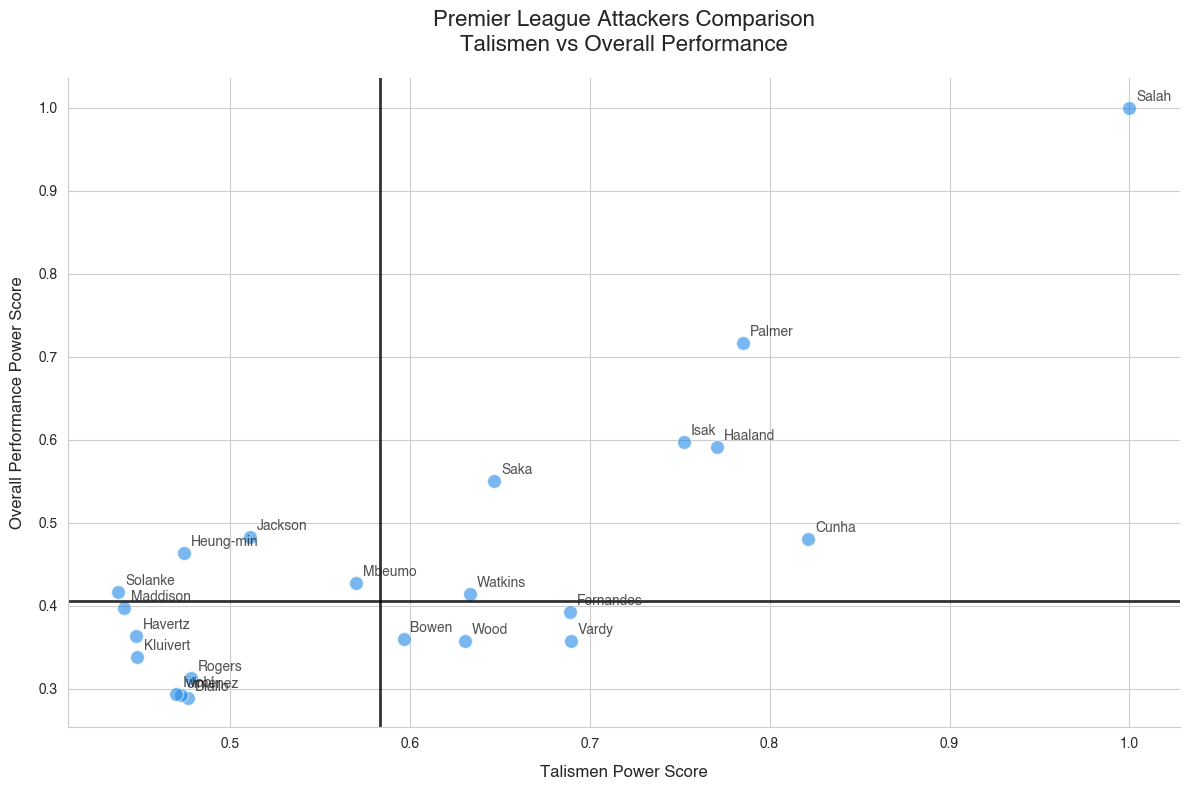

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'Helvetica'

merged_df = pd.merge(
   top_talismen[['player', 'power_score']],
   top[['Player', 'power_score']].rename(columns={'Player': 'player', 'power_score': 'power_score_2'}),
   on='player',
   how='inner'
)

ax = sns.scatterplot(data=merged_df, 
                   x='power_score', 
                   y='power_score_2',
                   s=100,  
                   color='#1e88e5',  
                   alpha=0.6)

for idx, row in merged_df.iterrows():
    lastname = row['player'].split()[-1]
    plt.annotate(lastname, 
               (row['power_score'], row['power_score_2']),
               xytext=(5, 5),
               textcoords='offset points',
               fontsize=10,
               alpha=0.8,
               fontweight='bold')

plt.title('Premier League Attackers Comparison\nTalismen vs Overall Performance', 
        fontsize=16, 
        pad=20, 
        fontweight='bold')

plt.xlabel('Talismen Power Score', fontsize=12, labelpad=10)
plt.ylabel('Overall Performance Power Score', fontsize=12, labelpad=10)

median_x = merged_df['power_score'].median()
median_y = merged_df['power_score_2'].median()
plt.axvline(x=median_x, color='black', linestyle='-', alpha=0.8, linewidth=2)
plt.axhline(y=median_y, color='black', linestyle='-', alpha=0.8, linewidth=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [18]:
talismen.sort_values(by='player_g/player_ag', ascending=False).head(20)

,player,squad,player_g,player_ag,player_xg,player_xag,squad_g,squad_xg,player_g+ag,player_xg+xag,player_g+ag/squad_g,player_xg+xag/squad_xg,player_g/player_ag,actual_score,expected_score,power_score,delta
184,Erling Haaland,Manchester City,13,1,14.0,1.2,30,32.8,14,15.2,46.666667,46.341463,13.0,0.691358,0.867767,0.770742,0.325203
483,Yoane Wissa,Brentford,9,1,6.4,0.8,32,26.1,10,7.2,31.25,27.586207,9.0,0.462963,0.516565,0.487084,3.663793
104,Liam Delap,Ipswich Town,6,1,4.4,1.3,16,15.9,7,5.7,43.75,35.849057,6.0,0.648148,0.671291,0.658563,7.900943
396,Antoine Semenyo,Bournemouth,5,1,5.6,2.8,27,35.4,6,8.4,22.222222,23.728814,5.0,0.329218,0.444334,0.38102,-1.506591
286,Bryan Mbeumo,Brentford,10,2,4.9,3.3,32,26.1,12,8.2,37.5,31.417625,5.0,0.555556,0.58831,0.570295,6.082375
37,Harvey Barnes,Newcastle Utd,5,1,2.8,2.4,30,30.3,6,5.2,20.0,17.161716,5.0,0.296296,0.321362,0.307576,2.838284
362,Marcus Rashford,Manchester Utd,4,1,1.7,2.1,21,25.8,5,3.8,23.809524,14.728682,4.0,0.352734,0.275802,0.318114,9.080842
282,Jean-Philippe Mateta,Crystal Palace,4,1,5.0,1.9,18,23.9,5,6.9,27.777778,28.870293,4.0,0.411523,0.54061,0.469612,-1.092515
110,Luis Díaz,Liverpool,7,2,4.8,1.8,40,38.2,9,6.6,22.5,17.277487,3.5,0.333333,0.323529,0.328922,5.222513
448,Leandro Trossard,Arsenal,3,1,3.0,2.1,34,29.3,4,5.1,11.764706,17.406143,3.0,0.174292,0.325939,0.242533,-5.641437


In [25]:
df1 = df1[df1['Comp'] == 'eng Premier League']
df1['Min'] = pd.to_numeric(df1['Min'], errors='coerce')
df1['xG'] = pd.to_numeric(df1['xG'], errors='coerce')
df1['xAG'] = pd.to_numeric(df1['xAG'], errors='coerce')
min_threshold = 0.7 * df1['Min'].max() 
dfd = df1[
 (df1['Pos'] == 'DF') & 
 ((df1['Min'] > min_threshold) | (df1['Player'] == 'Trent Alexander-Arnold') | (df1['Player'] == 'Jurriën Timber')
 | (df1['Player'] == 'Ibrahima Konaté'))
].copy()
dfd['xG+xAG'] = dfd['xG'] + dfd['xAG']
dfd = dfd[['Player', 'Squad', 'xG+xAG']].copy()
dfd = dfd.merge(
 tm_df[['Squad', 'xGA']], 
 on='Squad', 
 how='left'
)
dfd['off_score'] = (dfd['xG+xAG'] - dfd['xG+xAG'].min()) / (dfd['xG+xAG'].max() - dfd['xG+xAG'].min())
dfd['def_score'] = 1 - (dfd['xGA'] - dfd['xGA'].min()) / (dfd['xGA'].max() - dfd['xGA'].min())
dfd['power_score'] = (0.3 * dfd['off_score'] + 0.7 * dfd['def_score'])
above_avg_both = (dfd['off_score'] > dfd['off_score'].mean()) & (dfd['def_score'] > dfd['def_score'].mean())
dfd.loc[above_avg_both, 'power_score'] = dfd.loc[above_avg_both, 'power_score'] * 1.1
dfd = dfd.sort_values('power_score', ascending=False)
dfd['power_score'] = dfd['power_score'].round(3)
dfd['delta'] = (dfd['power_score'].shift(1) - dfd['power_score']).round(3)
dfd.iloc[0, dfd.columns.get_loc('delta')] = 0.000

top = dfd.head(20)
max_power = top['power_score'].max()
min_power = top['power_score'].min()
power_range = max_power - min_power

def style_df(df):
    def color_player(val):
        if not isinstance(val, str):  # skip non-player cells
            return ''
           
        idx = df.index[df['Player'] == val][0]
        score = df.loc[idx, 'power_score']
       
        if score >= max_power - power_range * 0.2:
            return 'color: gold'
        elif score >= max_power - power_range * 0.4:
            return 'color: silver'
        elif score >= max_power - power_range * 0.6:
            return 'color: #CD7F32'  # bronze
        elif score >= max_power - power_range * 0.8:
            return 'color: green'
        else:
            return 'color: purple'
           
    return df.style.applymap(color_player, subset=['Player'])

styled_df = style_df(top[['Player', 'Squad', 'xG+xAG', 'xGA', 'power_score', 'delta']])
styled_df

,Player,Squad,xG+xAG,xGA,power_score,delta
3,Trent Alexander-Arnold,Liverpool,5.200000,16.300000,1.084000,0.000000
43,Andrew Robertson,Liverpool,2.900000,16.300000,0.926000,0.158000
31,Gabriel Magalhães,Arsenal,2.600000,15.800000,0.921000,0.005000
45,William Saliba,Arsenal,2.400000,15.800000,0.908000,0.013000
34,Nikola Milenković,Nott'ham Forest,3.000000,18.900000,0.848000,0.060000
20,Lewis Hall,Newcastle Utd,3.600000,21.700000,0.799000,0.049000
44,Antonee Robinson,Fulham,3.300000,21.500000,0.785000,0.014000
37,Murillo,Nott'ham Forest,1.900000,18.900000,0.773000,0.012000
14,Lucas Digne,Aston Villa,3.700000,22.900000,0.767000,0.006000
50,Jurriën Timber,Arsenal,1.300000,15.800000,0.756000,0.011000


In [20]:
dfd[dfd['Squad'].str.contains('Everton')]

,Player,Squad,xG+xAG,xGA,off_score,def_score,power_score,delta
48,James Tarkowski,Everton,2.0,23.4,0.333333,0.680672,0.653,0.036
56,Ashley Young,Everton,1.3,23.4,0.187500,0.680672,0.557,0.002
38,Vitaliy Mykolenko,Everton,0.6,23.4,0.041667,0.680672,0.521,0.010


In [21]:
tables = pd.read_html('keepers.html')
df3 = tables[10]
df3.head(10)

Unnamed: 0_level_0  Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk              Player             Nation   
0                  1  Julen Agirrezabala             es ESP   
1                  2             Alisson             br BRA   
2                  3     Alphonse Areola             fr FRA   
3                  4   Kepa Arrizabalaga             es ESP   
4                  5        Noah Atubolu             de GER   
5                  6         Emil Audero             it ITA   
6                  7     Augusto Batalla             ar ARG   
7                  8      Oliver Baumann             de GER   
8                  9     Dimitry Bertaud             cd COD   
9                 10         Marco Bizot             nl NED   

  Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                 Pos              Squad                Comp   
0                 GK      Athletic Club          es La Liga   
1                 GK          Liverpool  eng Premier League   
2                 GK           West Ham  eng Premier League   
3                 GK        Bournemouth  eng Premier League   
4                 GK           Freiburg       de Bundesliga   
5                 GK               Como          it Serie A   
6                 GK     Rayo Vallecano          es La Liga   
7                 GK         Hoffenheim       de Bundesliga   
8                 GK        Montpellier          fr Ligue 1   
9                 GK              Brest          fr Ligue 1   

  Unnamed: 6_level_0 Unnamed: 7_level_0 Playing Time         ... Performance  \
                 Age               Born           MP Starts  ...           D   
0             24-002               2000           14     14  ...           4   
1             32-087               1992            9      9  ...           1   
2             31-305               1993            9      8  ...           2   
3             30-086               1994           13     13  ...           2   
4             22-217               2002           13     13  ...           3   
5             27-345               1997            8      8  ...           2   
6             28-242               1996           14     14  ...           6   
7             34-209               1990           15     15  ...           5   
8             26-205               1998            3      3  ...           0   
9             33-293               1991           14     14  ...           1   

              Penalty Kicks                     Unnamed: 27_level_0  
   L CS   CS%         PKatt PKA PKsv PKm  Save%             Matches  
0  1  5  35.7             2   1    1   0   50.0             Matches  
1  1  3  33.3             0   0    0   0    NaN             Matches  
2  4  2  25.0             0   0    0   0    NaN             Matches  
3  4  4  30.8             1   1    0   0    0.0             Matches  
4  4  4  30.8             1   0    1   0  100.0             Matches  
5  4  0   0.0             4   4    0   0    0.0             Matches  
6  4  3  21.4             1   1    0   0    0.0             Matches  
7  7  2  13.3             3   1    2   0   66.7             Matches  
8  2  0   0.0             1   1    0   0    0.0             Matches  
9  8  3  21.4             7   5    1   1   16.7             Matches  

[10 rows x 28 columns]

In [22]:
df3 = df3[df3.columns.drop(list(df3.filter(regex='Per 90')))]
df3 = df3.droplevel(0, axis=1)
df3.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%,Matches
0,1,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,24-002,2000,14,14,...,4,1,5,35.7,2,1,1,0,50.0,Matches
1,2,Alisson,br BRA,GK,Liverpool,eng Premier League,32-087,1992,9,9,...,1,1,3,33.3,0,0,0,0,NaN,Matches
2,3,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,31-305,1993,9,8,...,2,4,2,25.0,0,0,0,0,NaN,Matches
3,4,Kepa Arrizabalaga,es ESP,GK,Bournemouth,eng Premier League,30-086,1994,13,13,...,2,4,4,30.8,1,1,0,0,0.0,Matches
4,5,Noah Atubolu,de GER,GK,Freiburg,de Bundesliga,22-217,2002,13,13,...,3,4,4,30.8,1,0,1,0,100.0,Matches


In [23]:
pl_gk = df3[df3['Comp'] == 'eng Premier League']
pl_gk.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%,Matches
1,2,Alisson,br BRA,GK,Liverpool,eng Premier League,32-087,1992,9,9,...,1,1,3,33.3,0,0,0,0,NaN,Matches
2,3,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,31-305,1993,9,8,...,2,4,2,25.0,0,0,0,0,NaN,Matches
3,4,Kepa Arrizabalaga,es ESP,GK,Bournemouth,eng Premier League,30-086,1994,13,13,...,2,4,4,30.8,1,1,0,0,0.0,Matches
30,30,Martin Dúbravka,sk SVK,GK,Newcastle Utd,eng Premier League,35-348,1989,3,3,...,0,0,3,100.0,0,0,0,0,NaN,Matches
31,31,Ederson,br BRA,GK,Manchester City,eng Premier League,31-133,1993,13,13,...,2,4,2,15.4,2,2,0,0,0.0,Matches


In [24]:
pl_gk['MP'] = pd.to_numeric(pl_gk['MP'], errors='coerce')
min_threshold = 0.9 * pl_gk['MP'].max()
pl_gks = pl_gk[
    ((pl_gk['MP'] > min_threshold) & (pl_gk['Player'] != 'Nick Pope')) | (pl_gk['Player'] == 'Alisson')
][['Player', 'Saves', 'MP', 'Squad']].copy()
pl_gks['Saves'] = pd.to_numeric(pl_gks['Saves'], errors='coerce')
pl_gks['Save/90'] = pl_gks['Saves'] / pl_gks['MP']
pl_gks = pl_gks.merge(
 tm_df[['Squad', 'xGA']], 
 on='Squad',
 how='left'
)
pl_gks = pl_gks[['Player', 'Save/90', 'xGA']]
pl_gks['save_score'] = (pl_gks['Save/90'] - pl_gks['Save/90'].min()) / (pl_gks['Save/90'].max() - pl_gks['Save/90'].min())
pl_gks['def_score'] = 1 - (pl_gks['xGA'] - pl_gks['xGA'].min()) / (pl_gks['xGA'].max() - pl_gks['xGA'].min())
pl_gks['power_score'] = (0.4 * pl_gks['save_score'] + 0.6 * pl_gks['def_score'])
above_avg_both = (pl_gks['save_score'] > pl_gks['save_score'].mean()) & (pl_gks['def_score'] > pl_gks['def_score'].mean())
pl_gks.loc[above_avg_both, 'power_score'] = pl_gks.loc[above_avg_both, 'power_score'] * 1.1
pl_gks = pl_gks.sort_values('power_score', ascending=False)
pl_gks['power_score'] = pl_gks['power_score'].round(3)
pl_gks['delta'] = (pl_gks['power_score'].shift(1) - pl_gks['power_score']).round(3)
pl_gks.iloc[0, pl_gks.columns.get_loc('delta')] = 0.000

top = pl_gks.head(20)
max_power = top['power_score'].max()
min_power = top['power_score'].min()
power_range = max_power - min_power

def style_df(df):
    def color_player(val):
        if not isinstance(val, str):
            return ''
           
        idx = df.index[df['Player'] == val][0]
        score = df.loc[idx, 'power_score']
       
        if score >= max_power - power_range * 0.2:
            return 'color: gold'
        elif score >= max_power - power_range * 0.4:
            return 'color: darkgray'
        elif score >= max_power - power_range * 0.6:
            return 'color: #CD7F32'  # bronze
        elif score >= max_power - power_range * 0.8:
            return 'color: green'
        else:
            return 'color: purple'
           
    return df.style.applymap(color_player, subset=['Player'])

styled_df = style_df(top[['Player', 'Save/90', 'xGA', 'power_score', 'delta']])
styled_df

,Player,Save/90,xGA,power_score,delta
7,David Raya,2.647059,15.800000,0.696000,0.000000
9,Matz Sels,2.833333,18.900000,0.577000,0.119000
0,Alisson,2.000000,16.300000,0.576000,0.001000
3,Bernd Leno,2.833333,21.500000,0.454000,0.122000
1,Mark Flekken,4.705882,28.500000,0.400000,0.054000
6,Jordan Pickford,2.705882,23.400000,0.345000,0.055000
4,Emiliano Martínez,2.500000,22.900000,0.338000,0.007000
8,Robert Sánchez,3.352941,26.100000,0.313000,0.025000
2,Dean Henderson,2.944444,26.000000,0.258000,0.055000
5,André Onana,2.444444,25.200000,0.222000,0.036000
